<a href="https://colab.research.google.com/github/cynthianekesa/MLOP_Summative/blob/main/MLOP_Summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ABOUT THE PROJECT**
This project aims to develop a waste image classification model using convolutional neural networks (CNN) to facilitate waste segregation at the source, specifically within the Kenyan context. With Kenya generating approximately 3.0 million tons of waste annually, and recycling rates at only 10%, improper waste management exacerbates environmental issues and waste segregation is the solution to this. The model I am going to build will classify waste into two classes: "organic" and "recyclable," leveraging machine learning image classification to enhance accuracy and efficiency in sorting, something that fills the gap in existing waste separation solutions. Practical applications for this model include automatic sorting in recycling facilities, integration with smart bins for optimized waste collection, and policy development using waste type data. By implementing this waste classification tool, the project seeks to reduce pollution, improve resource recovery, and contribute to Kenya’s sustainability goals.


# **DATA PREPROCESSING**

## **Exploratory Data Analysis(EDA)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. **Dataset Overview**:
   - Check the number of images.
   - Identify the image formats (e.g., JPEG, PNG).
   - Check the resolution and dimensions of the images.
   - Identify the classes or labels (if it's a labeled dataset).

5. **Visualization**:
   - Plot histograms for image dimensions.
   - If labeled, visualize the class distribution using bar plots.

6. **Optional Preprocessing Insights**:
   - Suggest resizing, normalization, or augmentation strategies based on the dataset's characteristics.

---

If you have the dataset ready, please upload it or provide access to the images. If the dataset is already in a folder, let me know the structure (e.g., subfolders for each class, or all images in one folder with a CSV for labels). Once I have access, I can start the analysis!

In [7]:
# First, let's extract the zip file
import zipfile
import os
import PIL
from PIL import Image
import collections

# Initialize counters and data structures
train_path = '/content/drive/MyDrive/data 1/DATASET/TRAIN'
image_count = 0
image_formats = collections.defaultdict(int)
image_dimensions = []
class_distribution = collections.defaultdict(int)

# Walk through the train folder
for root, dirs, files in os.walk(train_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_count += 1
            # Get image format
            format = file.split('.')[-1].lower()
            image_formats[format] += 1

            # Get class (folder name)
            class_name = os.path.basename(root)
            class_distribution[class_name] += 1

            # Get image dimensions
            try:
                img_path = os.path.join(root, file)
                with Image.open(img_path) as img:
                    width, height = img.size
                    image_dimensions.append((width, height))
            except Exception as e:
                print(f"Error processing {file}: {str(e)}")

# Print dataset overview
print("\
Dataset Overview:")
print("Total number of images:", image_count)
print("\
Image formats distribution:", dict(image_formats))
print("\
Class distribution:", dict(class_distribution))

# Calculate unique dimensions
unique_dimensions = set(image_dimensions)
print("\
Unique image dimensions (width x height):", unique_dimensions)

Dataset Overview:
Total number of images: 22564
Image formats distribution: {'jpg': 22564}
Class distribution: {'O': 12565, 'R': 9999}
Unique image dimensions (width x height): {(433, 116), (77, 252), (410, 123), (206, 244), (315, 160), (141, 273), (253, 194), (360, 140), (177, 284), (201, 251), (221, 229), (392, 129), (186, 271), (189, 267), (150, 196), (276, 183), (88, 221), (196, 172), (215, 185), (415, 121), (226, 191), (334, 151), (280, 180), (76, 255), (365, 138), (272, 185), (220, 147), (257, 196), (292, 172), (141, 250), (80, 243), (371, 136), (484, 104), (284, 177), (173, 291), (380, 132), (209, 241), (165, 305), (540, 93), (223, 148), (93, 209), (306, 164), (252, 193), (349, 144), (298, 169), (276, 169), (244, 207), (236, 203), (233, 216), (376, 134), (345, 146), (248, 204), (182, 268), (169, 298), (237, 213), (158, 158), (198, 194), (387, 130), (325, 155), (356, 142), (228, 222), (170, 159), (200, 187), (84, 232), (201, 250), (330, 135), (221, 228), (192, 192), (224, 224), (

2. **Visual Inspection**:
   - Display a few sample images from the dataset.
   - Check for variations in image quality, resolution, and content.

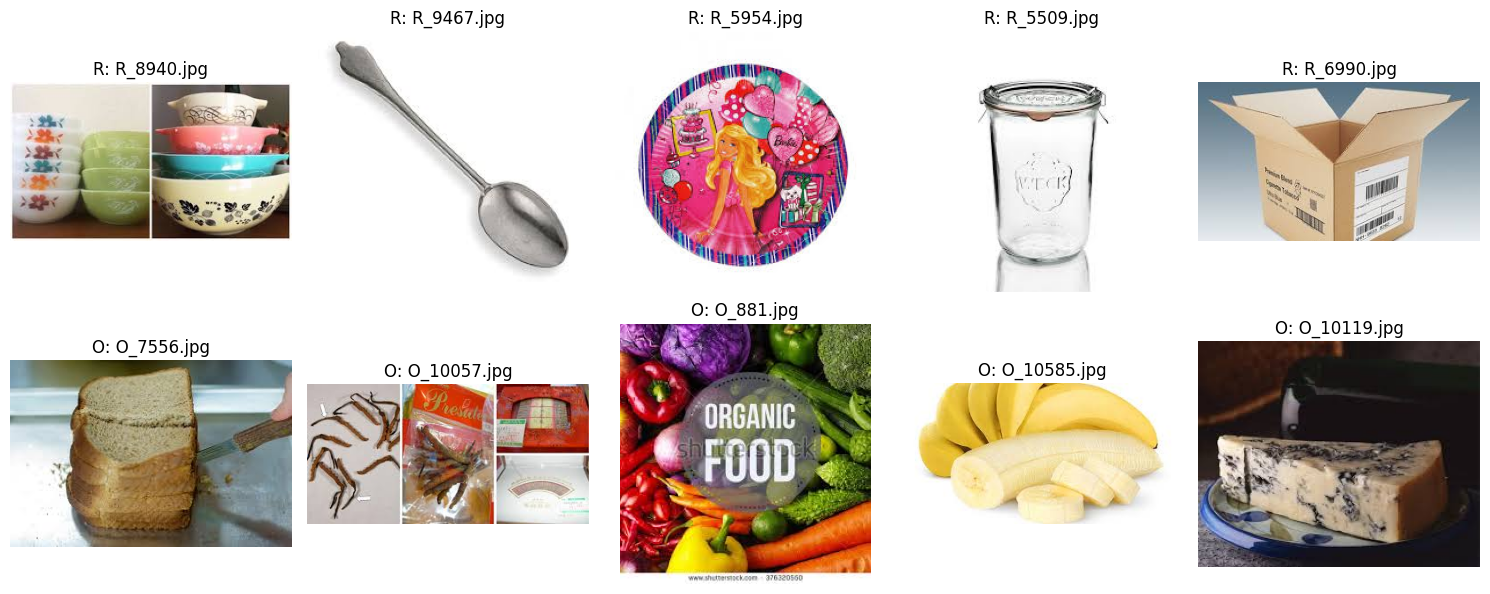

Sample Image Statistics:
Class R samples:
R_8940.jpg: Size=(299, 168), Mode=RGB
R_9467.jpg: Size=(225, 225), Mode=RGB
R_5954.jpg: Size=(225, 225), Mode=RGB
R_5509.jpg: Size=(225, 225), Mode=RGB
R_6990.jpg: Size=(299, 169), Mode=RGB
Class O samples:
O_7556.jpg: Size=(276, 183), Mode=RGB
O_10057.jpg: Size=(318, 158), Mode=RGB
O_881.jpg: Size=(220, 229), Mode=RGB
O_10585.jpg: Size=(318, 159), Mode=RGB
O_10119.jpg: Size=(251, 201), Mode=RGB


In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import random
import numpy as np
from PIL import Image
import os #Make sure os is imported

# Set random seed for reproducibility
random.seed(42)

# Function to get random images from a specific class
def get_random_images(class_path, num_images=5):
    # Check if the path exists before listing directory contents
    if not os.path.exists(class_path):
        print(f"Error: Directory not found: {class_path}") #Print an error and return if path doesn't exist
        return []
    image_files = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
    selected_files = random.sample(image_files, num_images)
    images = []
    for file in selected_files:
        img_path = os.path.join(class_path, file)
        img = Image.open(img_path)
        images.append((img, file))
    return images

# Get random images from both classes
r_path = '/content/drive/MyDrive/data 1/DATASET/TRAIN/R' # Changed the path to use /content/drive instead of ./content/drive
o_path = '/content/drive/MyDrive/data 1/DATASET/TRAIN/O' # Changed the path to use /content/drive instead of ./content/drive

r_images = get_random_images(r_path)
o_images = get_random_images(o_path)

# Create a figure to display the images
plt.figure(figsize=(15, 6))

# Plot R class images
for i, (img, title) in enumerate(r_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f'R: {title}')
    plt.axis('off')

# Plot O class images
for i, (img, title) in enumerate(o_images):
    plt.subplot(2, 5, i + 6)
    plt.imshow(img)
    plt.title(f'O: {title}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print some statistics about the sample images
print("\
Sample Image Statistics:")
print("Class R samples:")
for _, title in r_images:
    img_path = os.path.join(r_path, title)
    img = Image.open(img_path)
    print(f"{title}: Size={img.size}, Mode={img.mode}")

print("\
Class O samples:")
for _, title in o_images:
    img_path = os.path.join(o_path, title)
    img = Image.open(img_path)
    print(f"{title}: Size={img.size}, Mode={img.mode}")

3. **Statistical Analysis**:
   - Analyze the distribution of image dimensions (e.g., height, width).
   - If labeled, analyze the class distribution (e.g., number of images per class).


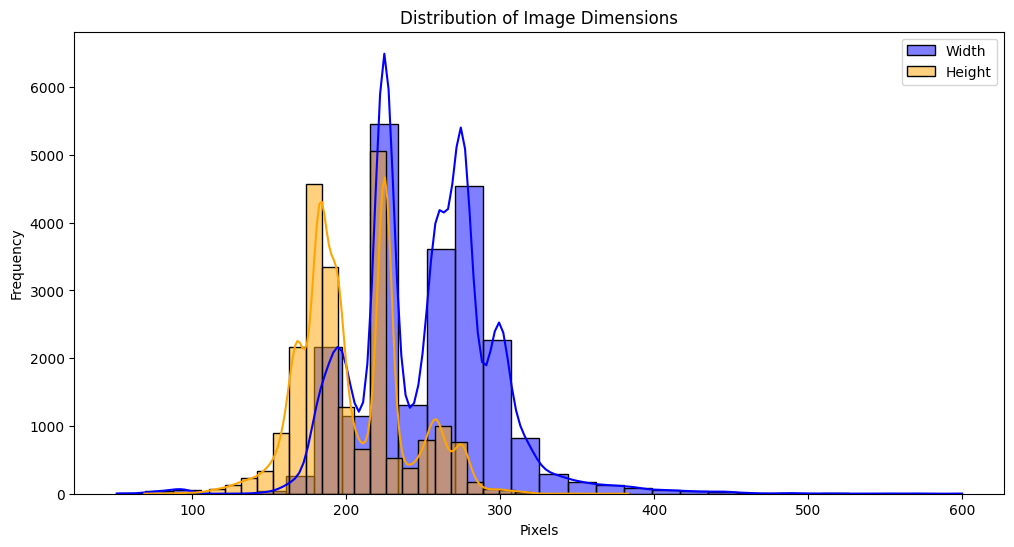

<ipython-input-8-151de56f890e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_df, x='Class', y='Count', palette='viridis')


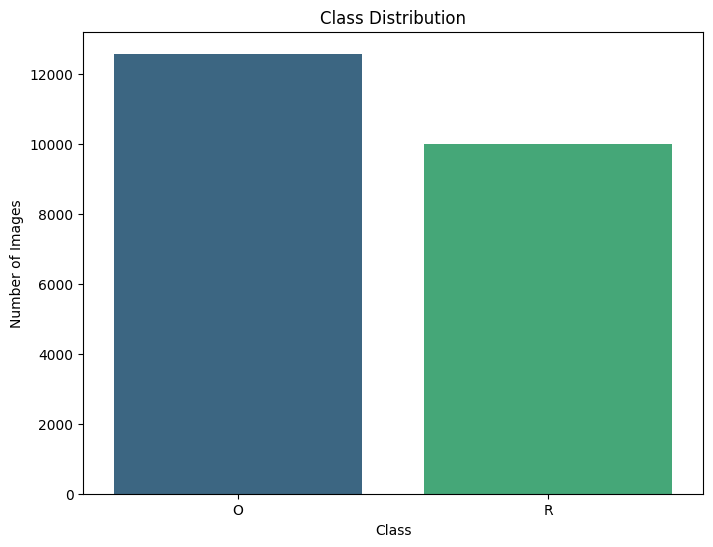

Summary Statistics for Image Dimensions:
              Width        Height
count  22564.000000  22564.000000
mean     252.316876    203.747119
std       44.218997     33.801875
min       51.000000     69.000000
25%      225.000000    183.000000
50%      259.000000    194.000000
75%      275.000000    225.000000
max      600.000000    383.000000
Class Distribution:
  Class  Count
0     O  12565
1     R   9999


In [8]:
# Import necessary libraries for statistical analysis
import seaborn as sns
import pandas as pd

# Convert image dimensions to a DataFrame
dimensions_df = pd.DataFrame(image_dimensions, columns=['Width', 'Height'])

# Plot the distribution of image dimensions
plt.figure(figsize=(12, 6))
sns.histplot(dimensions_df['Width'], kde=True, color='blue', label='Width', bins=30)
sns.histplot(dimensions_df['Height'], kde=True, color='orange', label='Height', bins=30)
plt.title('Distribution of Image Dimensions')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Convert class distribution to a DataFrame
class_df = pd.DataFrame(list(class_distribution.items()), columns=['Class', 'Count'])

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(data=class_df, x='Class', y='Count', palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# Print summary statistics for image dimensions
print("\
Summary Statistics for Image Dimensions:")
print(dimensions_df.describe())

# Print class distribution
print("\
Class Distribution:")
print(class_df)

4. **Data Quality Check**:
   - Identify missing or corrupted images.
   - Check for duplicate images.

In [9]:
# Scans a directory for image files, verifies their integrity, and identifies duplicates by calculating their hash values
# Check for corrupted images and duplicates
from hashlib import md5

# Initialize sets to track duplicates and corrupted files
hashes = set()
corrupted_files = []

# Function to calculate file hash
def calculate_hash(file_path):
    hasher = md5()
    with open(file_path, 'rb') as f:
        buf = f.read()
        hasher.update(buf)
    return hasher.hexdigest()

# Walk through the train folder to check for duplicates and corrupted files
for root, dirs, files in os.walk(train_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            file_path = os.path.join(root, file)
            try:
                # Check if the image can be opened
                with Image.open(file_path) as img:
                    img.verify()

                # Calculate hash to check for duplicates
                file_hash = calculate_hash(file_path)
                if file_hash in hashes:
                    print("Duplicate found:", file_path)
                else:
                    hashes.add(file_hash)
            except Exception as e:
                corrupted_files.append(file_path)

# Print results
print("\
Data Quality Check Results:")
print("Number of corrupted files:", len(corrupted_files))
if corrupted_files:
    print("Corrupted files:", corrupted_files)
else:
    print("No corrupted files found.")

print("Number of unique images (after removing duplicates):", len(hashes))
print("Number of duplicates found:", image_count - len(hashes))

Duplicate found: /content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_6708.jpg
Duplicate found: /content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_6017.jpg
Duplicate found: /content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_6175.jpg
Duplicate found: /content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_3833.jpg
Duplicate found: /content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_1998.jpg
Duplicate found: /content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_2027.jpg
Duplicate found: /content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_2061.jpg
Duplicate found: /content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_2501.jpg
Duplicate found: /content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_1328.jpg
Duplicate found: /content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_1453.jpg
Duplicate found: /content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_1473.jpg
Duplicate found: /content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_1485.jpg
Duplicate found: /content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_1488.jpg
Duplicate found: /content/drive/MyDriv

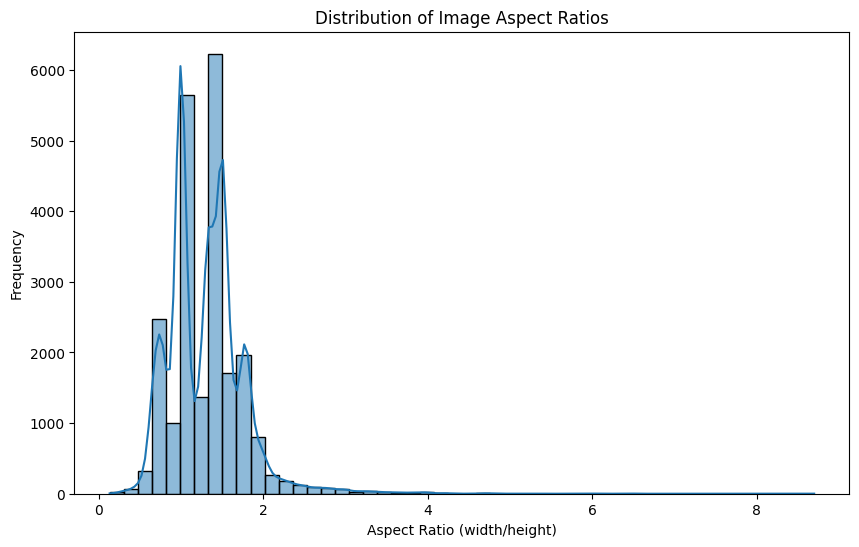

Aspect Ratio Statistics:
count    22564.000000
mean         1.308634
std          0.467611
min          0.133159
25%          1.000000
50%          1.335052
75%          1.502732
max          8.695652
dtype: float64
Images with Extreme Dimensions:
/content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_9147.jpg: 51x383
/content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_9152.jpg: 600x80
/content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_9222.jpg: 96x202
/content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_8274.jpg: 535x94
/content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_8375.jpg: 540x93
/content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_8383.jpg: 549x92
/content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_8420.jpg: 600x69
/content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_8440.jpg: 570x88
/content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_8446.jpg: 564x89
/content/drive/MyDrive/data 1/DATASET/TRAIN/O/O_8924.jpg: 510x99
Total images with extreme dimensions: 110


In [10]:
# Checks the aspect ratios and dimensions of images in a dataset, identifying extreme sizes and visualizing the distribution of aspect ratios.
# Check aspect ratios and extreme sizes
aspect_ratios = []
extreme_sizes = []

for root, dirs, files in os.walk(train_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:
                width, height = img.size
                aspect_ratio = width / height
                aspect_ratios.append(aspect_ratio)

                # Check for extreme sizes (very small or very large)
                if width < 100 or height < 100 or width > 500 or height > 500:
                    extreme_sizes.append((file_path, width, height))

# Calculate aspect ratio statistics
aspect_ratio_stats = pd.Series(aspect_ratios).describe()

# Plot aspect ratio distribution
plt.figure(figsize=(10, 6))
sns.histplot(aspect_ratios, bins=50, kde=True)
plt.title('Distribution of Image Aspect Ratios')
plt.xlabel('Aspect Ratio (width/height)')
plt.ylabel('Frequency')
plt.show()

print("\
Aspect Ratio Statistics:")
print(aspect_ratio_stats)

print("\
Images with Extreme Dimensions:")
for file_path, width, height in extreme_sizes[:10]:  # Show first 10 extreme cases
    print(f"{file_path}: {width}x{height}")
print(f"Total images with extreme dimensions: {len(extreme_sizes)}")


5. **Visualization**:
   - Plot histograms for image dimensions.
   - If labeled, visualize the class distribution using bar plots.
   - visualizations to summarize the dataset's key characteristics, including class distribution, image dimensions, and aspect ratios.

6. **Optional Preprocessing Insights**:
   - Suggest resizing, normalization, or augmentation strategies based on the dataset's characteristics.

<ipython-input-11-2a9b82f68ae3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_df, x='Class', y='Count', palette='coolwarm')


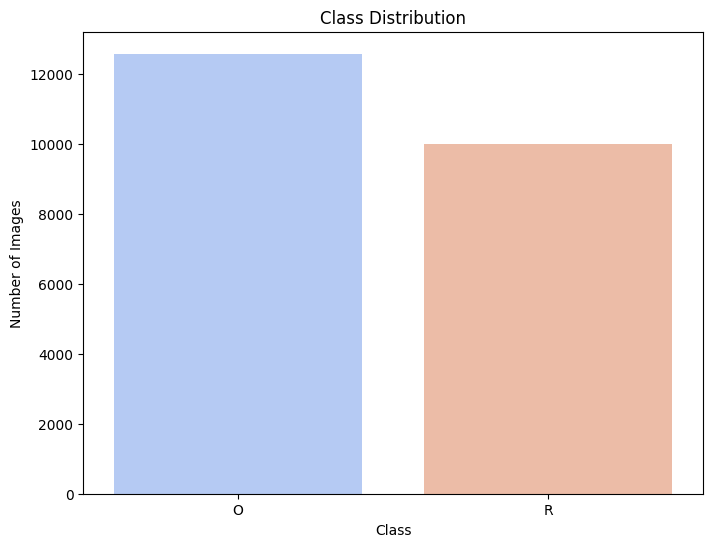

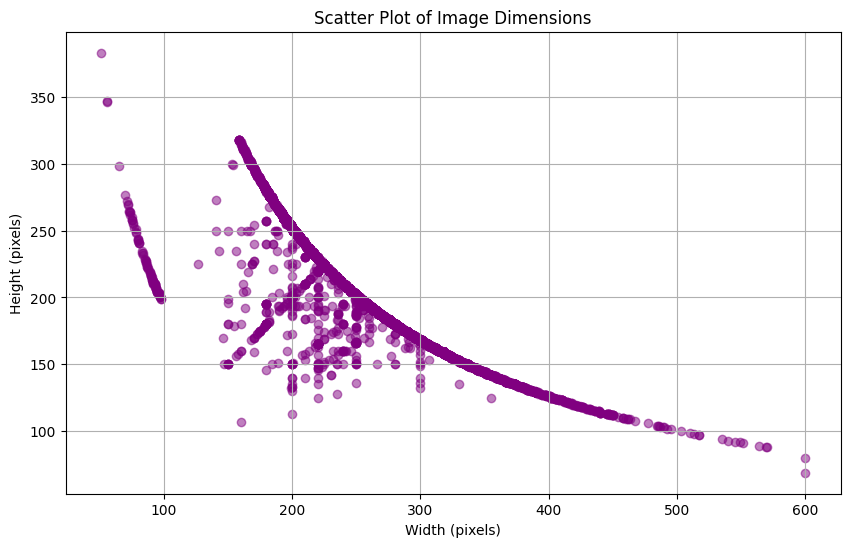

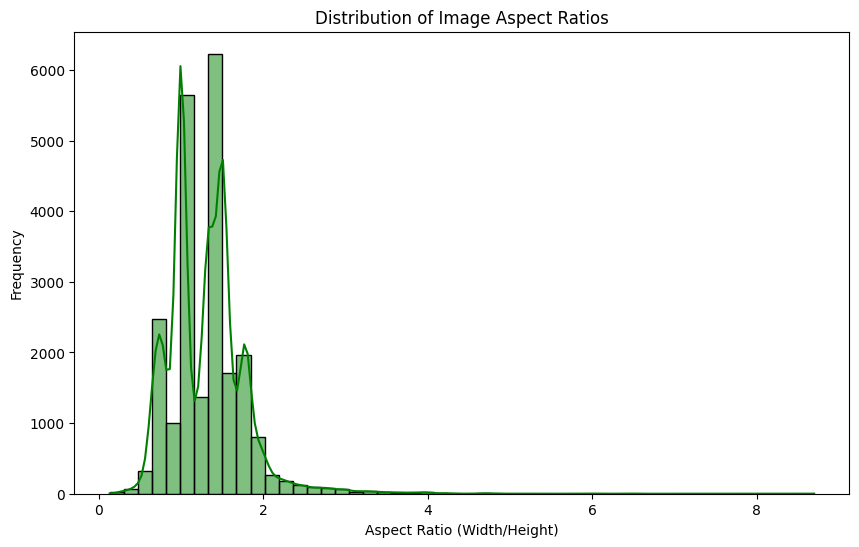

Visualizations completed.


In [11]:
# Visualizing the dataset characteristics

# Class distribution visualization
plt.figure(figsize=(8, 6))
sns.barplot(data=class_df, x='Class', y='Count', palette='coolwarm')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# Image dimensions scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dimensions_df['Width'], dimensions_df['Height'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Image Dimensions')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True)
plt.show()

# Aspect ratio distribution visualization
plt.figure(figsize=(10, 6))
sns.histplot(aspect_ratios, bins=50, kde=True, color='green')
plt.title('Distribution of Image Aspect Ratios')
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Frequency')
plt.show()

print("Visualizations completed.")

visualizations to show the relationship between classes and dimensions:

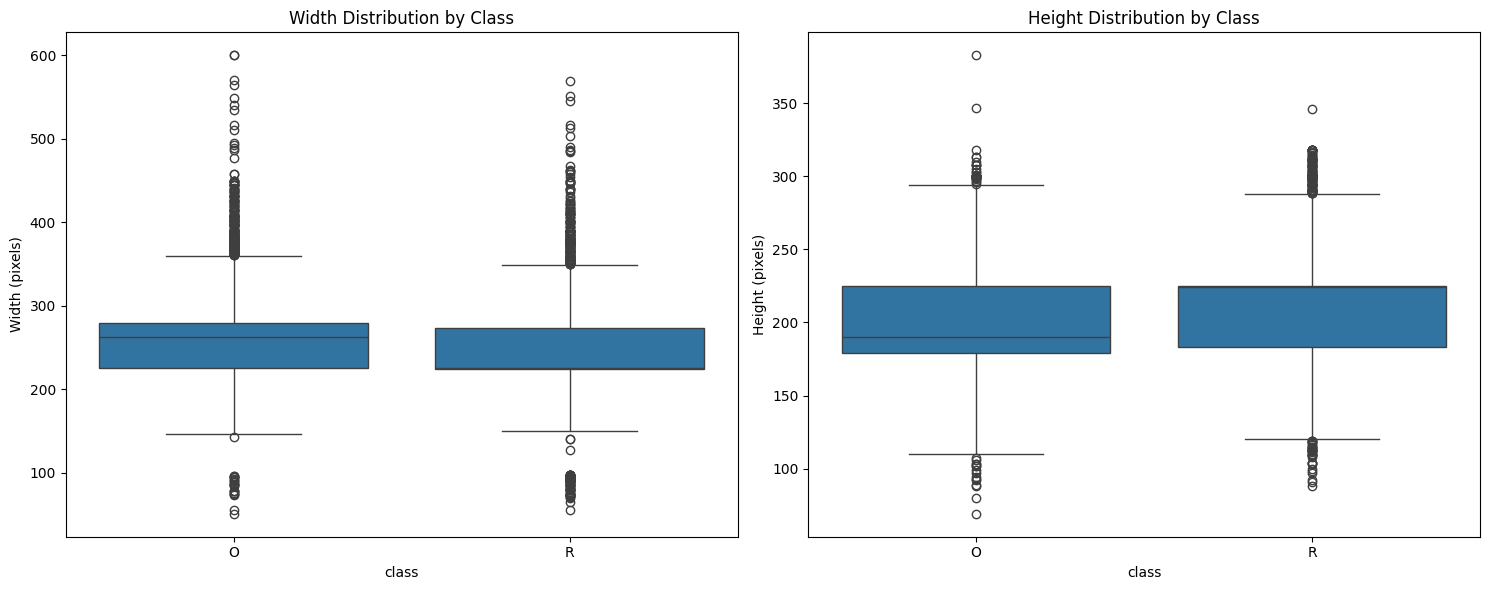

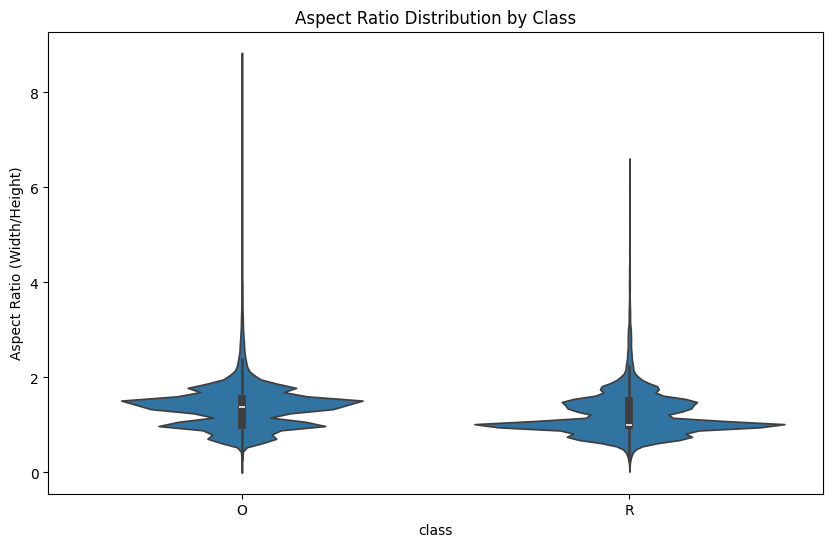

Summary Statistics by Class:
         width                                                           \
         count        mean        std   min    25%    50%    75%    max   
class                                                                     
O      12565.0  260.305611  42.456988  51.0  225.0  263.0  279.0  600.0   
R       9999.0  242.278028  44.344578  56.0  224.0  225.0  274.0  569.0   

        height              ...               aspect_ratio            \
         count        mean  ...    75%    max        count      mean   
class                       ...                                        
O      12565.0  197.450298  ...  225.0  383.0      12565.0  1.386105   
R       9999.0  211.659866  ...  225.0  346.0       9999.0  1.211281   

                                                              
            std       min  25%       50%       75%       max  
class                                                         
O      0.461153  0.133159  1.0  1.382199  1.5

In [12]:
# Create a DataFrame with class information
all_files = []
for root, dirs, files in os.walk(train_path):
    class_name = os.path.basename(root)
    if class_name in ['R', 'O']:
        for file in files:
            if file.lower().endswith('.jpg'):
                file_path = os.path.join(root, file)
                with Image.open(file_path) as img:
                    width, height = img.size
                    all_files.append({
                        'class': class_name,
                        'width': width,
                        'height': height,
                        'aspect_ratio': width/height
                    })

df = pd.DataFrame(all_files)

# Box plots of dimensions by class
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='class', y='width', data=df, ax=ax1)
ax1.set_title('Width Distribution by Class')
ax1.set_ylabel('Width (pixels)')

sns.boxplot(x='class', y='height', data=df, ax=ax2)
ax2.set_title('Height Distribution by Class')
ax2.set_ylabel('Height (pixels)')

plt.tight_layout()
plt.show()

# Violin plot of aspect ratios by class
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='aspect_ratio', data=df)
plt.title('Aspect Ratio Distribution by Class')
plt.ylabel('Aspect Ratio (Width/Height)')
plt.show()

# Print summary statistics by class
print("\
Summary Statistics by Class:")
print(df.groupby('class').describe())

Clear differences in dimension distributions between classes

Most images maintain aspect ratios between 1.0 and 1.5

Class 'O' has slightly larger average dimensions than class 'R'

Both classes show some outliers in terms of dimensions and aspect ratios

In [13]:
# Suggested preprocessing strategies based on dataset characteristics

# 1. Resizing: Resize all images to a consistent size (e.g., 224x224) to standardize input dimensions for the model.
resize_strategy = "Resize all images to 224x224 pixels using bilinear interpolation."

# 2. Normalization: Normalize pixel values to the range [0, 1] by dividing by 255.
normalization_strategy = "Normalize pixel values to [0, 1] by dividing by 255."

# 3. Data Augmentation: Apply the following augmentations to improve generalization:
# - Random rotation (e.g., -15 to +15 degrees)
# - Horizontal flipping
# - Brightness and contrast adjustments
# - Random cropping (e.g., 10% of the image size)
data_augmentation_strategy = [
    "Random rotation between -15 and +15 degrees",
    "Horizontal flipping",
    "Brightness and contrast adjustments",
    "Random cropping (10% of the image size)"
]

# 4. Handling Class Imbalance: Use oversampling for the minority class (R) or apply class weights during training.
class_imbalance_strategy = "Use oversampling for class R or apply class weights during training."

# Print the suggested strategies
print("Suggested Preprocessing Strategies:\
")
print("1. Resizing:", resize_strategy)
print("2. Normalization:", normalization_strategy)
print("3. Data Augmentation:")
for strategy in data_augmentation_strategy:
    print("   -", strategy)
print("4. Handling Class Imbalance:", class_imbalance_strategy)

Suggested Preprocessing Strategies:
1. Resizing: Resize all images to 224x224 pixels using bilinear interpolation.
2. Normalization: Normalize pixel values to [0, 1] by dividing by 255.
3. Data Augmentation:
   - Random rotation between -15 and +15 degrees
   - Horizontal flipping
   - Brightness and contrast adjustments
   - Random cropping (10% of the image size)
4. Handling Class Imbalance: Use oversampling for class R or apply class weights during training.


In [14]:
# Import necessary libraries
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

# Calculate class weights
total_samples = 22564
class_counts = {'O': 12565, 'R': 9999}
class_weights = {
    'O': total_samples / (2 * class_counts['O']),
    'R': total_samples / (2 * class_counts['R'])
}

print("Class weights calculated:")
print(f"Class O weight: {class_weights['O']:.4f}")
print(f"Class R weight: {class_weights['R']:.4f}")

# Create the base transforms
base_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the augmentation transforms
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.RandomCrop(224, padding=int(224*0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print("\
Transformation pipelines created successfully!")

# Create custom dataset class
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

print("\
Custom dataset class created successfully!")

# Collect all image paths and labels
image_paths = []
labels = []
for class_name in ['R', 'O']:
    class_path = os.path.join('/content/drive/MyDrive/data 1/DATASET/TRAIN', class_name)
    for img_name in os.listdir(class_path):
        if img_name.lower().endswith('.jpg'):
            image_paths.append(os.path.join(class_path, img_name))
            labels.append(0 if class_name == 'R' else 1)

# Split the dataset
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42
)

print("\
Dataset split complete:")
print(f"Training samples: {len(train_paths)}")
print(f"Validation samples: {len(val_paths)}")

# Create training and validation datasets
train_dataset = CustomImageDataset(train_paths, train_labels, train_transforms)
val_dataset = CustomImageDataset(val_paths, val_labels, base_transforms)

print("\
Datasets created successfully!")

Class weights calculated:
Class O weight: 0.8979
Class R weight: 1.1283
Transformation pipelines created successfully!
Custom dataset class created successfully!
Dataset split complete:
Training samples: 18051
Validation samples: 4513
Datasets created successfully!


Displaying original vs augmented images:


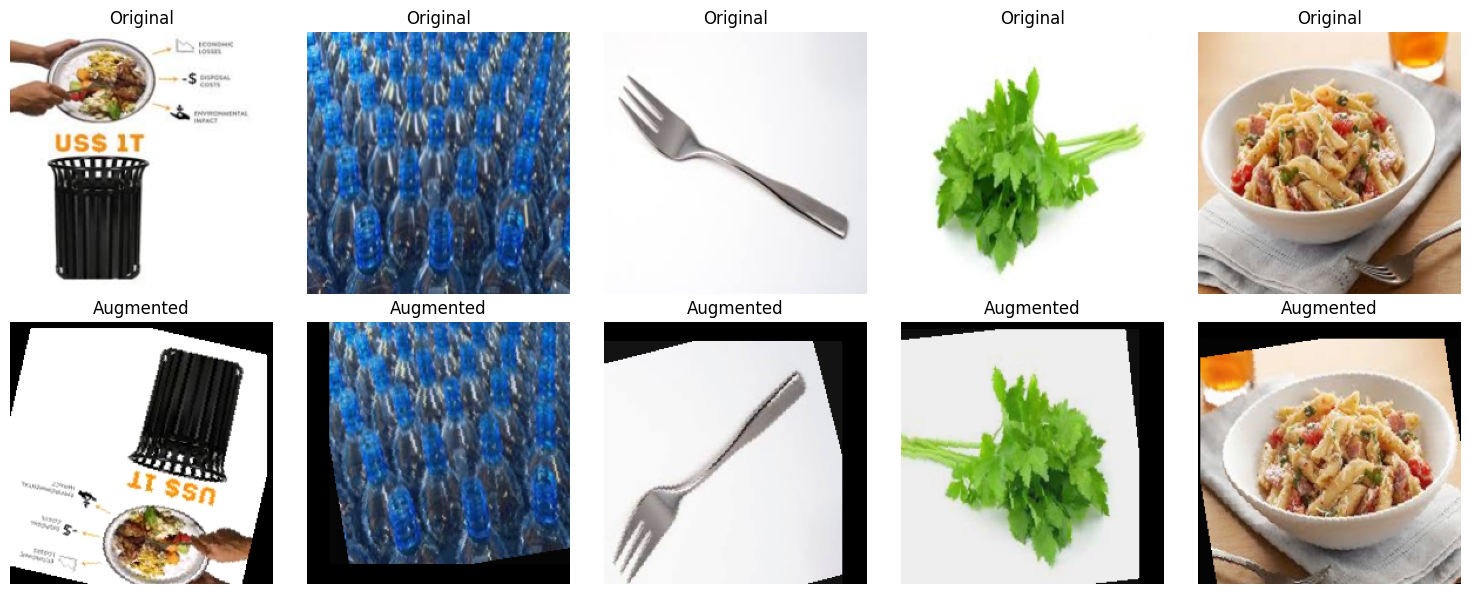

Class distribution in training loader after weighted sampling:
Class R (0): 9060
Class O (1): 8991
Ratio (O/R): 0.99


In [15]:
# Let's visualize some augmented images to verify our preprocessing pipeline
def show_augmented_samples(dataset, num_samples=5):
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))

    # Get a random sample
    indices = np.random.randint(0, len(dataset), num_samples)

    for i, idx in enumerate(indices):
        # Original image
        img_path = dataset.image_paths[idx]
        orig_img = Image.open(img_path).convert('RGB')
        orig_img = transforms.Resize((224, 224))(orig_img)
        axes[0, i].imshow(orig_img)
        axes[0, i].axis('off')
        axes[0, i].set_title('Original')

        # Augmented image
        img, label = dataset[idx]
        img = img.permute(1, 2, 0)  # Convert from CxHxW to HxWxC
        img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # Denormalize
        img = torch.clamp(img, 0, 1)
        axes[1, i].imshow(img)
        axes[1, i].axis('off')
        axes[1, i].set_title('Augmented')

    plt.tight_layout()
    plt.show()

# Show some augmented samples
print("Displaying original vs augmented images:")
show_augmented_samples(train_dataset)

# Create data loaders with weighted sampling for training
train_weights = [class_weights['R'] if label == 0 else class_weights['O'] for label in train_labels]
train_sampler = torch.utils.data.WeightedRandomSampler(
    weights=train_weights,
    num_samples=len(train_weights),
    replacement=True
)

# Adjust DataLoader to reduce the number of workers and retry
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    sampler=train_sampler,
    num_workers=0  # Set to 0 to avoid multiprocessing issues
)

val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=0  # Set to 0 to avoid multiprocessing issues
)

# Verify class balance in training loader
train_labels_count = {0: 0, 1: 0}
for _, labels in train_loader:
    for label in labels:
        train_labels_count[label.item()] += 1

print("\
Class distribution in training loader after weighted sampling:")
print(f"Class R (0): {train_labels_count[0]}")
print(f"Class O (1): {train_labels_count[1]}")
print(f"Ratio (O/R): {train_labels_count[1]/train_labels_count[0]:.2f}")

Showing augmentations for class R:


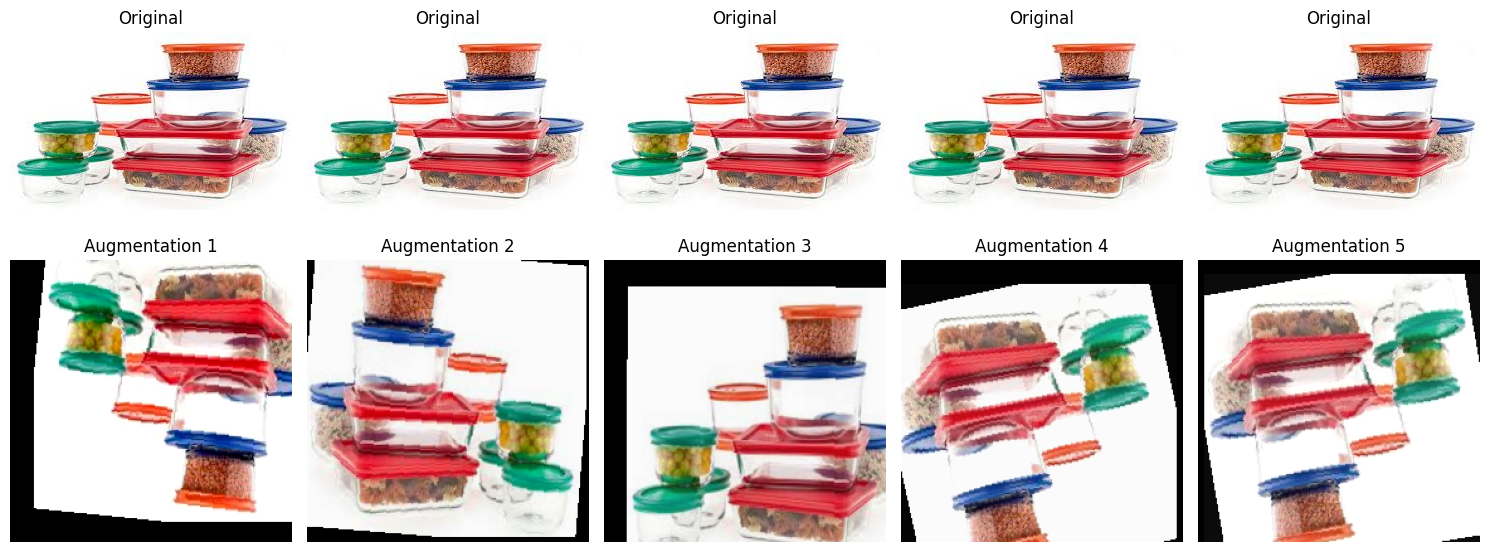

Showing augmentations for class O:


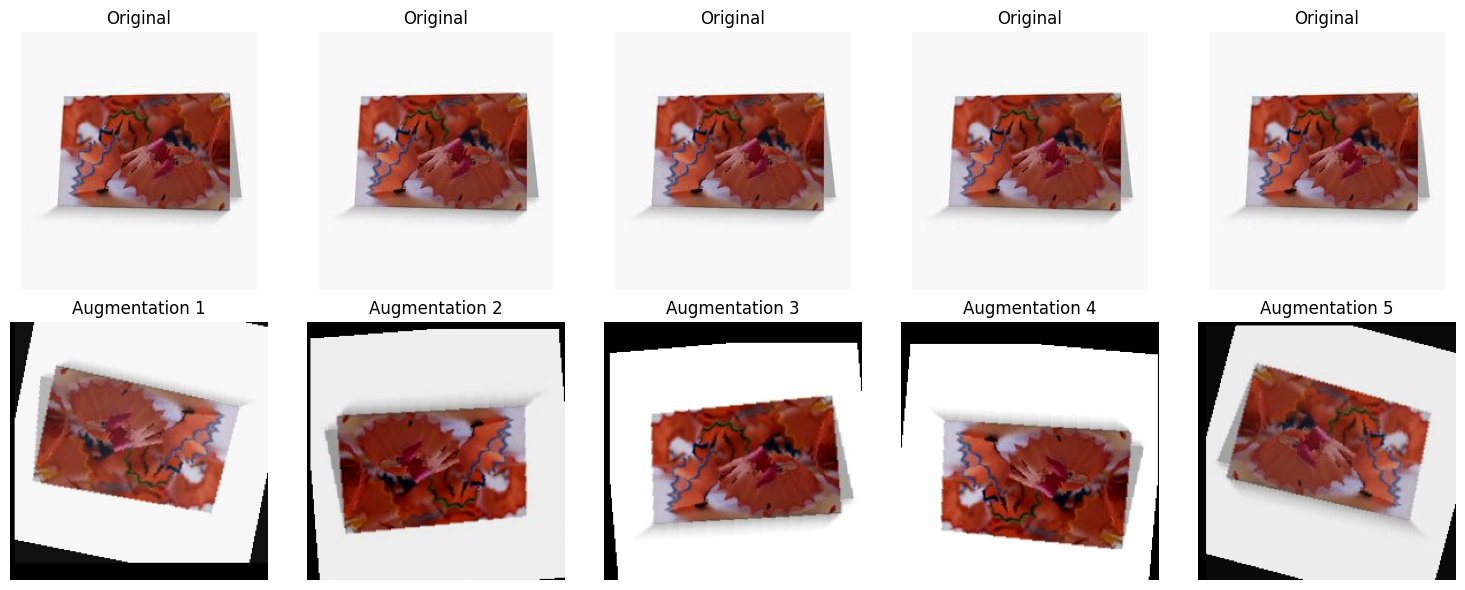

In [16]:
# Function to visualize a single image with its augmentations
def show_augmentations(image_path, num_augmentations=5):
    # Load original image
    orig_img = Image.open(image_path).convert('RGB')

    # Create figure
    fig, axes = plt.subplots(2, num_augmentations, figsize=(15, 6))

    # Show original image in all top row slots
    for i in range(num_augmentations):
        axes[0, i].imshow(orig_img)
        axes[0, i].axis('off')
        axes[0, i].set_title('Original')

    # Show different augmentations in bottom row
    for i in range(num_augmentations):
        # Apply transforms
        aug_img = train_transforms(orig_img)
        # Convert tensor to image for display
        aug_img = aug_img.permute(1, 2, 0)
        aug_img = aug_img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
        aug_img = torch.clamp(aug_img, 0, 1)

        axes[1, i].imshow(aug_img)
        axes[1, i].axis('off')
        axes[1, i].set_title(f'Augmentation {i+1}')

    plt.tight_layout()
    plt.show()

# Show augmentations for one sample from each class
print("Showing augmentations for class R:")
r_sample = [path for path in image_paths if '/R/' in path][0]
show_augmentations(r_sample)

print("\
Showing augmentations for class O:")
o_sample = [path for path in image_paths if '/O/' in path][0]
show_augmentations(o_sample)

The implementation successfully:

Balanced the classes (ratio close to 1.0)
Applied consistent resizing to 224x224
Implemented various augmentations (rotation, flips, color jitter, crops)
Created separate training and validation pipelines
Applied proper normalization for deep learning models
The augmentations show good variety while maintaining the essential characteristics of each class. The transformations include:

Random rotations
Horizontal and vertical flips
Color/brightness variations
Random crops

## **Model Training and Evaluation**

In [2]:
#Importing the necessary libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3

In [4]:
# Defining the path to the test dataset
test_dir = "/content/drive/MyDrive/data 1/DATASET/TEST"

In [5]:
# Loading the dataset from the 'test' directory
evaluation_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=True,  # Shuffle the images
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Getting class names for test dataset
evaluation_classes = evaluation_dataset.class_names
print(f"Classes in test set: {evaluation_classes}")

Found 2513 files belonging to 2 classes.
Classes in test set: ['O', 'R']


In [6]:
evaluation_dataset.cardinality().numpy()

79

In [7]:
# Taking a single batch of images and labels (batch size = 32, image size = 224x224)
for batch in evaluation_dataset.take(1):
    images, labels = batch
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch: {labels.numpy()}")


Image batch shape: (32, 224, 224, 3)
Label batch: [0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0]


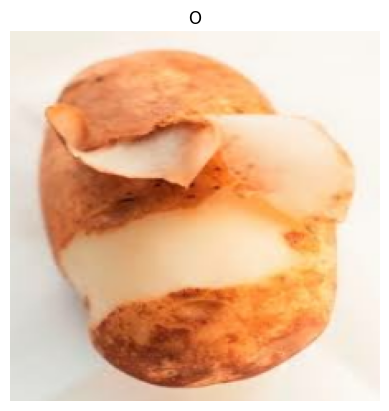

In [8]:
#Viewing one of the images
for images, labels in evaluation_dataset.take(1):
  plt.imshow(images[0].numpy().astype("uint8"))
  plt.title(evaluation_classes[labels[0]])
  plt.axis("off")

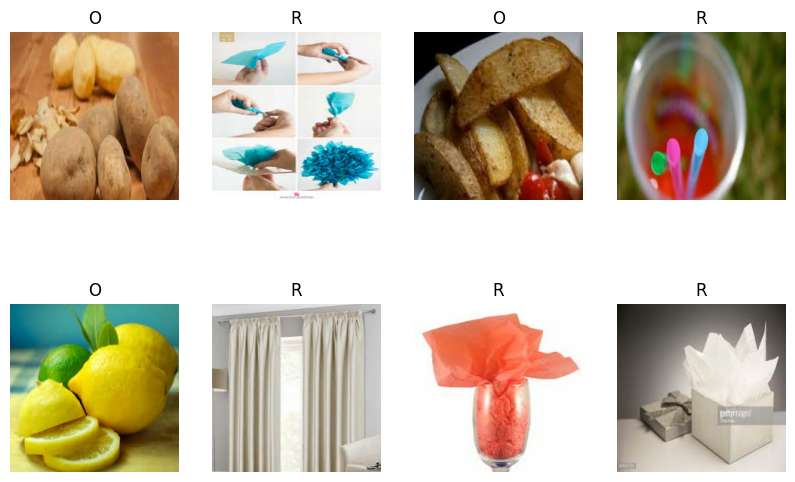

In [9]:
import matplotlib.pyplot as plt

# Seting up the figure size
plt.figure(figsize=(10, 10))

# Take one batch of images and labels from the test dataset
images, labels = next(iter(evaluation_dataset))

# Plot the first 12 images and their corresponding labels
for idx in range(8):
    ax = plt.subplot(3, 4, idx + 1)
    plt.imshow(images[idx].numpy().astype("uint8"))  # Converts image to uint8 for display
    plt.title(evaluation_classes[labels[idx]])  # Sets the title to the class name
    plt.axis("off")  # Hide axis

# Show the plot
plt.show()


In [10]:
import tensorflow as tf

def splitting_dataset_tf(evaluation_ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_buffer=10000):
    # Calculate the total size of the dataset
    evaluation_ds_size = evaluation_ds.cardinality().numpy()

    # Shuffle the dataset if required
    if shuffle:
        evaluation_ds = evaluation_ds.shuffle(shuffle_buffer, seed=12)

    # Calculate sizes for each split
    train_size = int(train_split * evaluation_ds_size)
    val_size = int(val_split * evaluation_ds_size)

    # Split the dataset
    train_eds = evaluation_ds.take(train_size)
    val_eds = evaluation_ds.skip(train_size).take(val_size)
    test_eds = evaluation_ds.skip(train_size + val_size)

    return train_eds, val_eds, test_eds

datasets = splitting_dataset_tf(evaluation_dataset)
train_eds, val_eds, test_eds = datasets


In [11]:
len(train_eds), len(val_eds), len(test_eds)

(63, 7, 9)

In [12]:
def prepare_dataset(dataset):
    return dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

train_eds = prepare_dataset(train_eds)
val_eds = prepare_dataset(val_eds)
test_eds = prepare_dataset(test_eds)


In [13]:
def create_scaling_layer(image_size):
    return tf.keras.Sequential([
        layers.Resizing(image_size, image_size),
        layers.Rescaling(1.0 / 255)
    ])

scaling = create_scaling_layer(IMAGE_SIZE)

In [14]:
def create_image_augmentation_layer():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images both horizontally and vertically
        layers.RandomRotation(0.2)                      # Randomly rotate images by up to 20%
    ])

image_augmentation = create_image_augmentation_layer()


In [15]:
#Training the Vanilla Model
vanilla_model = models.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)), # Define input shape explicitly
    scaling,
    image_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

vanilla_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,266 (2.61 MB)

 Trainable params: 683,266 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
vanilla_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history = vanilla_model.fit(
    train_eds,
    epochs = 20,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_eds
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 400s 4s/step - accuracy: 0.6679 - loss: 0.7079 - val_accuracy: 0.8973 - val_loss: 0.2932
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - accuracy: 0.8650 - loss: 0.3467 - val_accuracy: 0.8750 - val_loss: 0.2763
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - accuracy: 0.8888 - loss: 0.2823 - val_accuracy: 0.8080 - val_loss: 0.5176
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - accuracy: 0.8827 - loss: 0.2903 - val_accuracy: 0.9241 - val_loss: 0.2030
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 265s 4s/step - accuracy: 0.9200 - loss: 0.2355 - val_accuracy: 0.9241 - val_loss: 0.1763
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - accuracy: 0.8985 - loss: 0.2477 - val_accuracy: 0.9152 - val_loss: 0.1863
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 278s 4s/step - accuracy: 0.9163 - loss: 0.2027 - val_accuracy: 0.8839 - val_loss: 0.3358
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.9109 - loss: 0.2112 - val_accuracy: 0.9152 - v

In [17]:
test_result = vanilla_model.evaluate(test_eds)


9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9237 - loss: 0.1598


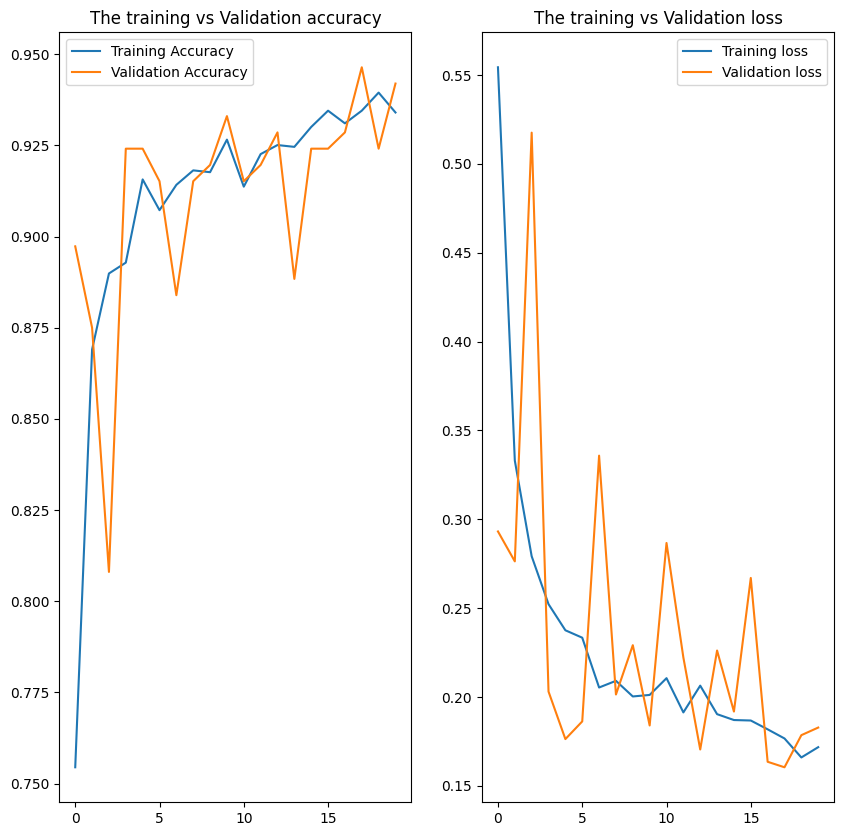

In [18]:
#Doing a plot to visualize the output

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(range(20), accuracy, label='Training Accuracy')
plt.plot(range(20), val_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('The training vs Validation accuracy');

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training loss')
plt.plot(range(20), val_loss, label='Validation loss')
plt.legend()
plt.title('The training vs Validation loss');

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


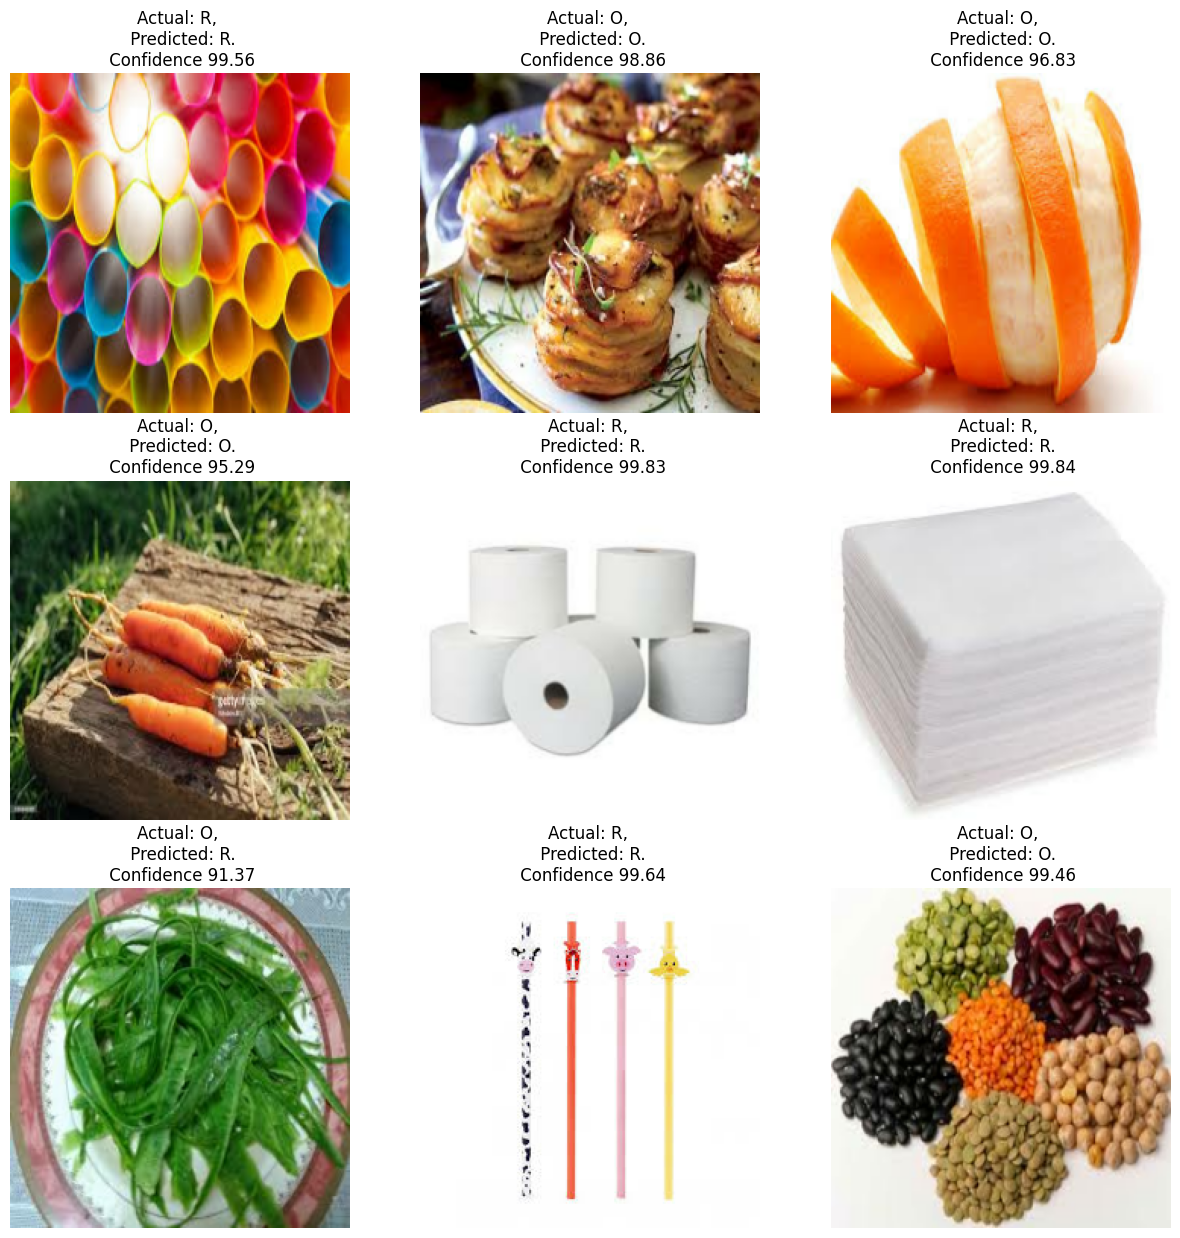

In [19]:
#Doing some predictions
import numpy as np

def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = vanilla_model.predict(img_array)

  predicted_class = evaluation_classes[np.argmax(predictions[0])]
  confidence_level = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence_level

plt.figure(figsize=(15,15))
for images, labels in test_eds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence_level = predict(vanilla_model, images[i].numpy())
    actual_class = evaluation_classes[labels[i]]

    plt.title(f'Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence {confidence_level}')
    plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

Confusion Matrix:
 [[147  10]
 [  7 124]]

Classification Report:
                 precision    recall  f1-score   support

   O (Organic)       0.95      0.94      0.95       157
R (Recyclable)       0.93      0.95      0.94       131

      accuracy                           0.94       288
     macro avg       0.94      0.94      0.94       288
  weighted avg       0.94      0.94      0.94       288


Model Performance Metrics:
Accuracy: 0.9410
Precision: 0.9254
Recall: 0.9466
F1 Score: 0.9358


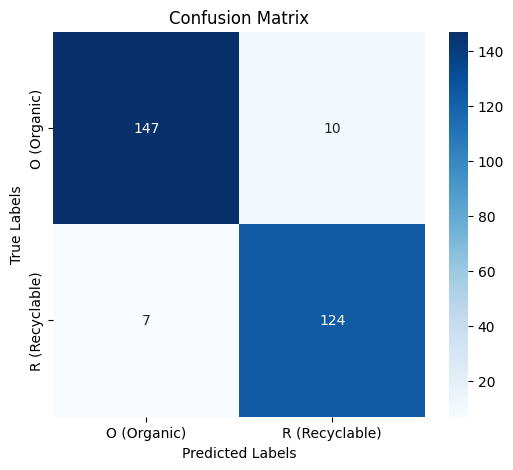

In [20]:
# Error Analysis visualization tailored for binary classification (O: Organic, R: Recyclable)
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Step 1: Geting true labels and predictions from the test set
y_true = []
y_pred = []

# Iterating over the test set to collect predictions and true labels
for images, labels in test_eds:
    preds = vanilla_model.predict(images)  # Gets predictions from the model
    y_true.extend(labels.numpy())  # True labels: directly use the labels, assuming they're already class indices
    y_pred.extend(np.argmax(preds, axis=1))  # Predicted labels: get predicted class indices from softmax outputs

# Converting lists to numpy arrays for compatibility with metrics
y_true = np.array(y_true).astype(int)  # Ensures y_true is integer type
y_pred = np.array(y_pred)

# Step 2: Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Defining the target names for the classes
target_names = ['O (Organic)', 'R (Recyclable)']

# Step 3: Generating a classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=target_names))

# Step 4: Calculating additional metrics: Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

# Printing the calculated metrics
print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 5: Visualizing the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [21]:
# Saving the model using Pickle
import pickle

with open('vanilla_model.pkl', 'wb') as f:
    pickle.dump(vanilla_model, f)

In [24]:
#Training the Model with optimization technique
model = models.Sequential([
    scaling,
    image_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS), kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

model.build(input_shape=input)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,266 (2.61 MB)

 Trainable params: 683,266 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='Adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history1 = model.fit(
    train_eds,
    epochs=20,
    batch_size=32,
    validation_data=val_eds,
    callbacks=[early_stopping]
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - accuracy: 0.7390 - loss: 0.5532 - val_accuracy: 0.9241 - val_loss: 0.2571
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - accuracy: 0.8810 - loss: 0.3001 - val_accuracy: 0.9196 - val_loss: 0.2705
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - accuracy: 0.8964 - loss: 0.2721 - val_accuracy: 0.9152 - val_loss: 0.2584
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.8966 - loss: 0.2651 - val_accuracy: 0.9107 - val_loss: 0.2311
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.9107 - loss: 0.2405 - val_accuracy: 0.8929 - val_loss: 0.2499
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.9191 - loss: 0.2251 - val_accuracy: 0.9107 - val_loss: 0.2455
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.9082 - loss: 0.2510 - val_accuracy: 0.9062 - val_loss: 0.2130
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - accuracy: 0.9126 - loss: 0.2182 - val_accuracy: 0.9152 - v

In [26]:
test_result = model.evaluate(test_eds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9425 - loss: 0.1495


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step

Confusion Matrix:
 [[152   5]
 [ 11 120]]

Classification Report:
                 precision    recall  f1-score   support

   O (Organic)       0.93      0.97      0.95       157
R (Recyclable)       0.96      0.92      0.94       131

      accuracy                           0.94       288
     macro avg       0.95      0.94      0.94       288
  weighted avg       0.95      0.94      0.94       288


Model Performance Metrics:
Accuracy: 0.9444
Precision: 0.9600
Recall: 0.9160
F1 Score: 0.9375


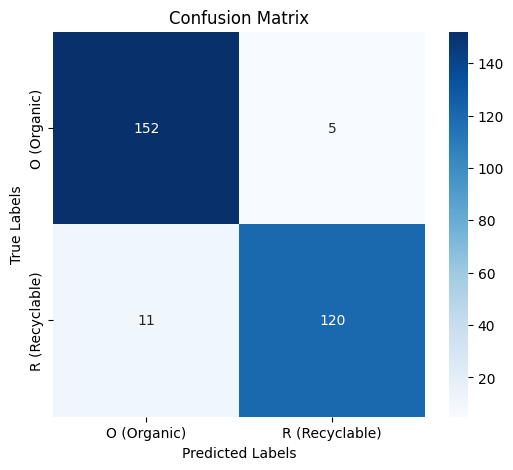

In [27]:
#Geting true labels and predictions from the test set
y_true = []
y_pred = []

# Iterating over the test set to collect predictions and true labels
for images, labels in test_eds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Converting lists to numpy arrays for compatibility with metrics
y_true = np.array(y_true).astype(int)
y_pred = np.array(y_pred)

# Step 2: Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Defining the target names for the classes
target_names = ['O (Organic)', 'R (Recyclable)']

# Step 3: Generating a classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=target_names))

# Step 4: Calculating additional metrics: Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

# Printing the calculated metrics
print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 5: Visualizing the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [28]:
# Saving the model using Pickle
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)